# Assignment 1 - Intensity Transformation ##

**N.L.Hettiarachchi**  
**D/ENG/21/0114/EE**

**Question 1**

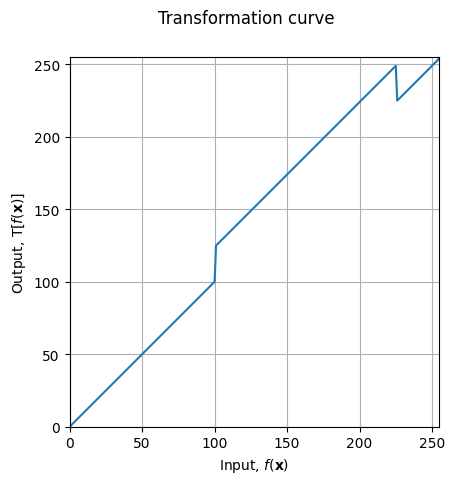

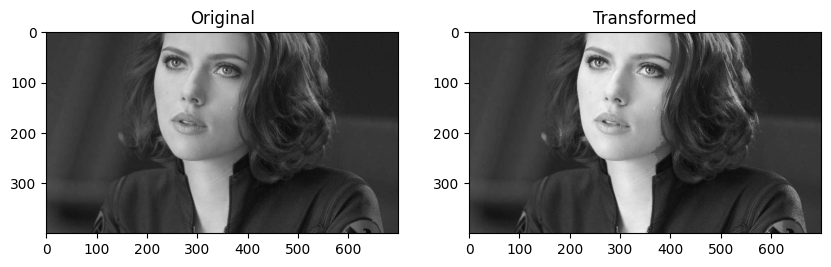

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread('natasha_grayscale.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None

t1 = np.linspace(0, 100, 101).astype('uint8')
t2 = np.linspace(125, 249, 125).astype('uint8') 
t3 = np.linspace(225, 255,30).astype('uint8') 

transform = np.concatenate((t1,t2,t3), axis=0).astype('uint8')

fig, ax = plt.subplots()
fig.suptitle("Transformation curve")
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.grid()
plt.show()

image_transform = cv.LUT(im, transform)

fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(image_transform, cmap="gray")
ax[1].set_title("Transformed")
plt.show()


**Question 2**

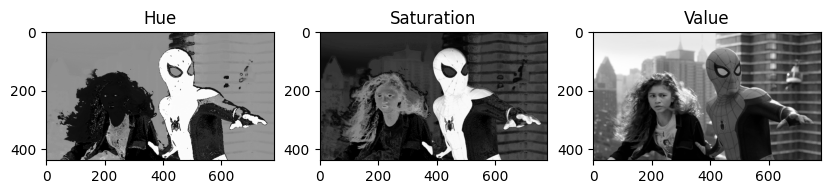

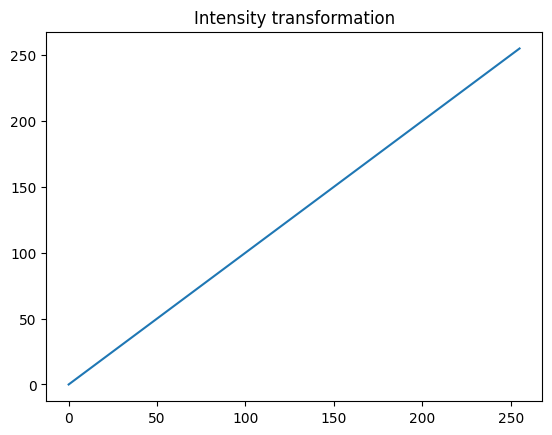

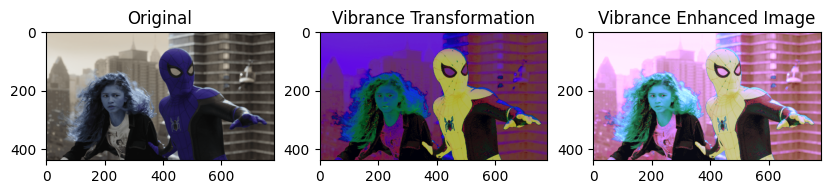

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread('spider.png', cv.IMREAD_COLOR)
assert im is not None

im1 = cv.cvtColor(im, cv.COLOR_BGR2HSV)
h_img,s_img,v_img = cv.split(im1)

fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(h_img, cmap="gray")
ax[0].set_title('Hue')
ax[1].imshow(s_img, cmap="gray")
ax[1].set_title('Saturation')
ax[2].imshow(v_img, cmap="gray")
ax[2].set_title('Value')
plt.show()

x= np.arange(0, 256).astype('uint8')
a = .1
sigma = 70
Y = np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))/128), 255).astype('uint8')
image_transform = cv.LUT(s_img, Y)
plt.title('Intensity transformation')
plt.plot(Y)
plt.show()

newHSV = cv.merge([h_img,image_transform,v_img])
result =  cv.cvtColor(newHSV,  cv.COLOR_HSV2BGR)
added_img = cv.add(newHSV, im)

fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(im, cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(newHSV, cmap="gray")
ax[1].set_title('Vibrance Transformation')
ax[2].imshow(added_img, cmap="gray")
ax[2].set_title('Vibrance Enhanced Image')
plt.show()

**Question 3**

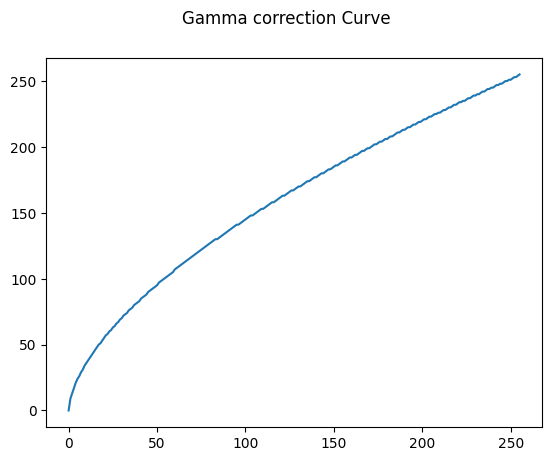

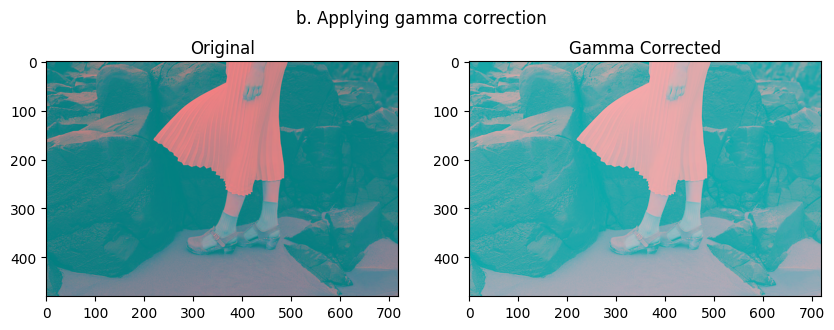

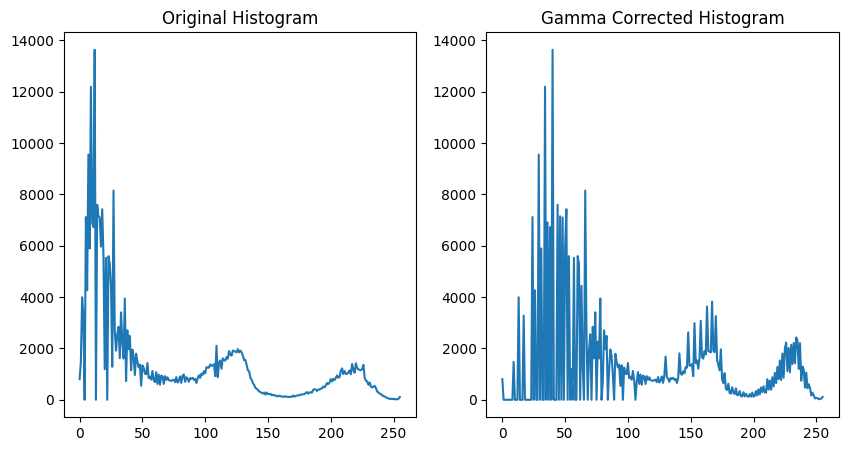

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread ('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert im is not None

im_LAB = cv.cvtColor(im, cv.COLOR_BGR2LAB) 

gamma = .6
t = np.array([(i/255.)**gamma*255 for i in range (256)], np.uint8)
g = t[im_LAB]
plt.suptitle("Gamma correction Curve")
plt.plot(t)
plt.show()

fig, ax = plt.subplots(1,2, figsize=(10,3.5))
fig.suptitle("b. Applying gamma correction")
ax[0].imshow(im_LAB, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(g,cmap="gray")
ax[1].set_title("Gamma Corrected")
plt.show()

plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
plt.gca().set_title('Original Histogram')
im_h = cv.calcHist([im_LAB],[0],None,[256],[0,256])
plt.plot(im_h)

plt.subplot(1, 2, 2)
plt.gca().set_title('Gamma Corrected Histogram')
g_h = cv.calcHist([g],[0],None,[256],[0,256])
plt.plot(g_h)
plt.show()